In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
customer = np.zeros(100)
for i in range(100):
    customer[i] = i+1
print(customer)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


In [3]:
interarrival_time = np.random.randint(1, high=9, size=(100))
interarrival_time[0] = 0
print(interarrival_time)

[0 7 2 6 7 5 7 1 1 5 8 6 2 6 6 4 1 8 4 4 6 1 3 6 6 8 1 5 4 5 7 7 3 1 2 4 3
 6 5 2 5 6 5 2 5 6 5 7 7 6 8 8 5 7 4 6 5 5 6 1 1 5 1 6 1 8 8 2 1 4 5 7 6 8
 1 2 2 5 3 2 7 5 5 8 8 7 2 2 2 4 3 2 6 6 5 6 7 2 4 3]


In [4]:
service_time = np.zeros(100)
for i in range(100):
    a = np.random.rand()
    if a < 0.1:
        service_time[i] = 1
    elif a < 0.3:
        service_time[i] = 2
    elif a < 0.6:
        service_time[i] = 3
    elif a < 0.85:
        service_time[i] = 4
    elif a < 0.95:
        service_time[i] = 5
    else:
        service_time[i] = 6
print(service_time)

[3. 4. 4. 4. 4. 4. 5. 4. 4. 3. 4. 5. 2. 4. 3. 2. 3. 4. 2. 2. 3. 3. 2. 3.
 3. 3. 5. 3. 4. 1. 4. 2. 3. 2. 6. 6. 4. 3. 4. 3. 3. 3. 5. 3. 1. 1. 4. 4.
 2. 3. 4. 1. 3. 4. 3. 2. 4. 5. 4. 1. 2. 3. 4. 3. 2. 3. 2. 5. 2. 4. 3. 5.
 2. 1. 2. 3. 3. 4. 3. 1. 4. 4. 4. 6. 4. 5. 4. 2. 4. 1. 4. 1. 2. 1. 1. 2.
 3. 1. 4. 4.]


In [5]:
arrival_time = np.zeros(100)
for i in range(1,100):
    arrival_time[i] = arrival_time[i-1] + interarrival_time[i]
print(arrival_time)

[  0.   7.   9.  15.  22.  27.  34.  35.  36.  41.  49.  55.  57.  63.
  69.  73.  74.  82.  86.  90.  96.  97. 100. 106. 112. 120. 121. 126.
 130. 135. 142. 149. 152. 153. 155. 159. 162. 168. 173. 175. 180. 186.
 191. 193. 198. 204. 209. 216. 223. 229. 237. 245. 250. 257. 261. 267.
 272. 277. 283. 284. 285. 290. 291. 297. 298. 306. 314. 316. 317. 321.
 326. 333. 339. 347. 348. 350. 352. 357. 360. 362. 369. 374. 379. 387.
 395. 402. 404. 406. 408. 412. 415. 417. 423. 429. 434. 440. 447. 449.
 453. 456.]


In [6]:
time_service_begins = np.zeros(100)
time_service_ends = np.zeros(100)
time_service_ends[0] = time_service_begins[0] + service_time[0]
for i in range(1,100):
    time_service_begins[i] = max(arrival_time[i], time_service_ends[i-1])
    time_service_ends[i] = time_service_begins[i] + service_time[i]

In [7]:
waiting_time = np.zeros(100)
time_in_system = np.zeros(100)
idle_time_server = np.zeros(100)
for i in range(1,100):
    waiting_time[i] = time_service_begins[i] - arrival_time[i]
    time_in_system[i] = time_service_ends[i] - arrival_time[i]
    idle_time_server[i] = time_service_begins[i] - time_service_ends[i-1]

In [8]:
data = {
    'customer': customer.astype(int),
    'interarrival_time': interarrival_time.astype(int),
    'arrival_time': arrival_time.astype(int),
    'service_time': service_time.astype(int),
    'time_service_begins': time_service_begins.astype(int),
    'waiting_time': waiting_time.astype(int),
    'time_service_ends': time_service_ends.astype(int),
    'time_in_system': time_in_system.astype(int),
    'idle_time_server': idle_time_server.astype(int)
}

output = pd.DataFrame(data)

output

,customer,interarrival_time,arrival_time,service_time,time_service_begins,waiting_time,time_service_ends,time_in_system,idle_time_server
0,1,0,0,3,0,0,3,0,0
1,2,7,7,4,7,0,11,4,4
2,3,2,9,4,11,2,15,6,0
3,4,6,15,4,15,0,19,4,0
4,5,7,22,4,22,0,26,4,3
...,...,...,...,...,...,...,...,...,...
95,96,6,440,2,440,0,442,2,5
96,97,7,447,3,447,0,450,3,5
97,98,2,449,1,450,1,451,2,0
98,99,4,453,4,453,0,457,4,2


In [9]:
customer = np.zeros(100)
for i in range(100):
    customer[i] = i+1

interarrival_time = np.random.randint(1, high=9, size=(100))
interarrival_time[0] = 0

service_time = np.zeros(100)
for i in range(100):
    a = np.random.rand()
    if a < 0.1:
        service_time[i] = 1
    elif a < 0.3:
        service_time[i] = 2
    elif a < 0.6:
        service_time[i] = 3
    elif a < 0.85:
        service_time[i] = 4
    elif a < 0.95:
        service_time[i] = 5
    else:
        service_time[i] = 6

arrival_time = np.zeros(100)
for i in range(1,100):
    arrival_time[i] = arrival_time[i-1] + interarrival_time[i]

time_service_begins = np.zeros(100)
time_service_ends = np.zeros(100)
time_service_ends[0] = time_service_begins[0] + service_time[0]
for i in range(1,100):
    time_service_begins[i] = max(arrival_time[i], time_service_ends[i-1])
    time_service_ends[i] = time_service_begins[i] + service_time[i]

waiting_time = np.zeros(100)
time_in_system = np.zeros(100)
idle_time_server = np.zeros(100)
for i in range(1,100):
    waiting_time[i] = time_service_begins[i] - arrival_time[i]
    time_in_system[i] = time_service_ends[i] - arrival_time[i]
    idle_time_server[i] = time_service_begins[i] - time_service_ends[i-1]

data = {
    'customer': customer.astype(int),
    'interarrival_time': interarrival_time.astype(int),
    'arrival_time': arrival_time.astype(int),
    'service_time': service_time.astype(int),
    'time_service_begins': time_service_begins.astype(int),
    'waiting_time': waiting_time.astype(int),
    'time_service_ends': time_service_ends.astype(int),
    'time_in_system': time_in_system.astype(int),
    'idle_time_server': idle_time_server.astype(int)
}

# output = pd.DataFrame(data)

# output

# output.describe()

probability_of_idle_server = np.sum(idle_time_server)/time_service_ends[99]
print(probability_of_idle_server)

0.3515151515151515


In [10]:
# 50 trials

average_waiting_time = np.zeros(50)
for trial in range(50):
    customer = np.zeros(100)
    for i in range(100):
        customer[i] = i+1

    interarrival_time = np.random.randint(1, high=9, size=(100))
    interarrival_time[0] = 0

    service_time = np.zeros(100)
    for i in range(100):
        a = np.random.rand()
        if a < 0.1:
            service_time[i] = 1
        elif a < 0.3:
            service_time[i] = 2
        elif a < 0.6:
            service_time[i] = 3
        elif a < 0.85:
            service_time[i] = 4
        elif a < 0.95:
            service_time[i] = 5
        else:
            service_time[i] = 6

    arrival_time = np.zeros(100)
    for i in range(1,100):
        arrival_time[i] = arrival_time[i-1] + interarrival_time[i]

    time_service_begins = np.zeros(100)
    time_service_ends = np.zeros(100)
    time_service_ends[0] = time_service_begins[0] + service_time[0]
    for i in range(1,100):
        time_service_begins[i] = max(arrival_time[i], time_service_ends[i-1])
        time_service_ends[i] = time_service_begins[i] + service_time[i]

    waiting_time = np.zeros(100)
    time_in_system = np.zeros(100)
    idle_time_server = np.zeros(100)
    for i in range(1,100):
        waiting_time[i] = time_service_begins[i] - arrival_time[i]
        time_in_system[i] = time_service_ends[i] - arrival_time[i]
        idle_time_server[i] = time_service_begins[i] - time_service_ends[i-1]

    data = {
        'customer': customer.astype(int),
        'interarrival_time': interarrival_time.astype(int),
        'arrival_time': arrival_time.astype(int),
        'service_time': service_time.astype(int),
        'time_service_begins': time_service_begins.astype(int),
        'waiting_time': waiting_time.astype(int),
        'time_service_ends': time_service_ends.astype(int),
        'time_in_system': time_in_system.astype(int),
        'idle_time_server': idle_time_server.astype(int)
    }

    average_waiting_time[trial] = np.sum(waiting_time)/100

In [ ]:
print(average_waiting_time)

[1.55 1.24 2.54 1.68 1.26 3.91 1.16 1.54 1.54 5.64 1.15 0.95 0.7  1.67
 0.79 0.73 1.38 1.17 1.61 0.46 0.83 0.84 2.22 1.   1.39 0.87 1.69 0.98
 0.72 2.1  1.69 2.23 0.87 0.91 1.52 0.74 1.03 1.8  1.26 1.7  1.43 1.84
 1.05 1.15 4.06 2.03 1.7  0.87 1.27 0.61]


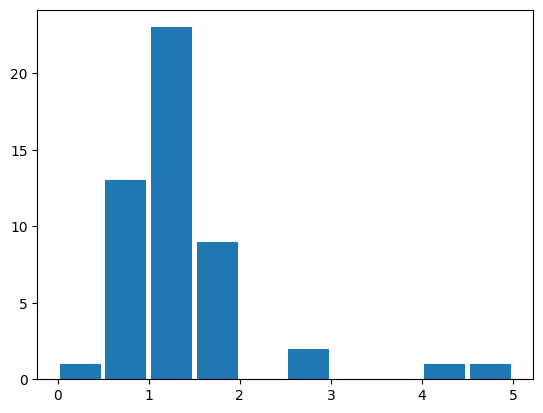

In [11]:
plt.hist(average_waiting_time, range=(0,5), rwidth = 0.9)
plt.show()